In [1]:
library(ggpubr)
library(ggrepel)
library(ggplotify)
library(pheatmap)
library(stringr)
library(dendsort)
library(patchwork)
library(tidyverse)
theme_set(theme_pubr(base_size = 10))

Loading required package: ggplot2

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ purrr   0.3.4
✔ tidyr   1.2.0     ✔ dplyr   1.0.9
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
gene_id_to_name <- read.table("../../data/gene_id_to_name/gene_id_to_name_comprehensive.tsv", sep="\t", header=T, row.names=1, stringsAsFactors = F)

In [3]:
te.up.genes.highlight <- c("RAD59", "RAD32", "PRR2", "BMT7", "SUT1", "NTG1", "MLH1", "OPI3", "CSE4", "PGA1", "HGT4", "HGT5", "CKA2", "TRX1", "ROA1")
te.down.genes.highlight <- c("MAL2", "SLR1", "HRT1", "RRN11", "DAD3", "UBC4", "DCC1", "GIT2", "YPD1", "FAA2", "MNN15", "ATP1", "CTA26", "ERG12", "FDH1", "ERG24", "ZRT2", "RTT101")

In [4]:
de.up.genes.highlight <- c("INO1", "PGA13", "HGT1", "DDR48", "RBT4", "ERG6", "ARG1", "PGA23", "RTA4", "RPN4", "HGT19", "ARG3", "ECM331", "GAL10", "RTA2", "SET3", "CRH11", "TEF4", "CDR1", "CDR11", "SAP9", "SOD4", "ERG11", "UPC2")
de.down.genes.highlight <- c("RHD3", "OPT1", "OPT7", "OPT3", "AQY1", "SSA2", "SIT1", "ALS4", "ALS2", "CSR1", "SEO1", "RPS19A", "RPS12", "FET31", "RPS21", "PGA32", "UBI3", "FCR1")

In [5]:
te.results <- read.table("../../results//riborex/translation_efficiency_annotated.tsv", sep = "\t", stringsAsFactors = F)
te.results

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C1_03470C,113.780494,-9.440918,1.7850253,-5.288955,1.230173e-07,0.0007335522
C2_07620W,20.721354,-8.823314,1.9295761,-4.572670,4.815488e-06,0.0143573788
C2_10320C,52.323147,-8.048081,1.7958219,-4.481558,7.410002e-06,0.0147286133
C3_02370C,677.511196,2.512275,0.5760978,4.360849,1.295588e-05,0.0193139751
C4_03460C,13.621507,-7.560565,1.8235965,-4.145964,3.383869e-05,0.0403560218
C2_06650C,228.933758,2.584337,0.6352628,4.068139,4.739018e-05,0.0455405771
C7_04180W,405.185270,2.191624,0.5427450,4.038036,5.390048e-05,0.0455405771
C4_06750C,20.386211,-7.476360,1.8651120,-4.008531,6.109754e-05,0.0455405771
C2_03960W,208.285157,3.236060,0.8307523,3.895337,9.806219e-05,0.0649716480


In [6]:
te.results <- read.table("../../results//riborex/translation_efficiency_annotated.tsv", sep = "\t", stringsAsFactors = F)
te.up.genes <- readLines("../../results/DE_TE_tpm_above_1_cutoff0.75/TE_up.txt")
te.down.genes <- readLines("../../results/DE_TE_tpm_above_1_cutoff0.75/TE_down.txt")
te.tpm.filtered <- read.csv("../../results/DE_TE_tpm_above_1_cutoff0.75/te_expressed_genelist.txt", row.names = 1, sep="\t", stringsAsFactors = F)
te.results <- te.results[row.names(te.tpm.filtered),]


te.results$status <- "NS"
te.results$pvalue[is.na(te.results$pvalue)] <- 100
te.results$status[(te.results$log2FoldChange>0) &  (te.results$pvalue<= 0.05)] <- "increased TE"
te.results$status[(te.results$log2FoldChange<0) &  (te.results$pvalue<= 0.05)] <- "reduced TE"

te.results$pvalue[te.results$pvalue>1] <- NA

rownames(te.results) <- gene_id_to_name[rownames(te.results), "gene_name"]

In [7]:
te.results

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,status
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
RBR1,74.96956,-5.08923061,1.5448377,-3.29434639,0.0009865085,0.15723574,reduced TE
MAL2,125.94111,-5.05178304,1.5622676,-3.23362215,0.0012223105,0.17283343,reduced TE
C3_07900C,186.49247,-4.56916708,1.1924176,-3.83185129,0.0001271826,0.07583899,reduced TE
HOL1,309.97343,-4.63140112,1.7930966,-2.58290658,NA,NA,NS
C3_03160C,149.14682,-4.47576633,1.4154585,-3.16206123,0.0015665662,0.18316538,reduced TE
C4_06200W,49.09797,-4.36434744,1.6774949,-2.60170541,0.0092761495,0.37390827,reduced TE
SLR1,160.45763,-4.31030703,1.4333663,-3.00712188,0.0026373400,0.23480391,reduced TE
C5_04040C,132.81140,-4.23281320,1.5109124,-2.80149470,0.0050866476,0.31595500,reduced TE
C1_06870C,69.80473,4.67580671,1.8183308,2.57148301,0.0101263985,0.37477629,increased TE


In [8]:
keyvals <- ifelse(
    te.results$status == "reduced TE", '#006d2c',
      ifelse(te.results$status == "increased TE", '#de2d26',
        'grey50'))
names(keyvals)[keyvals == '#006d2c'] <- 'reduced TE'
names(keyvals)[keyvals == '#de2d26'] <- 'increased TE'
names(keyvals)[keyvals == 'grey50'] <- 'NS'

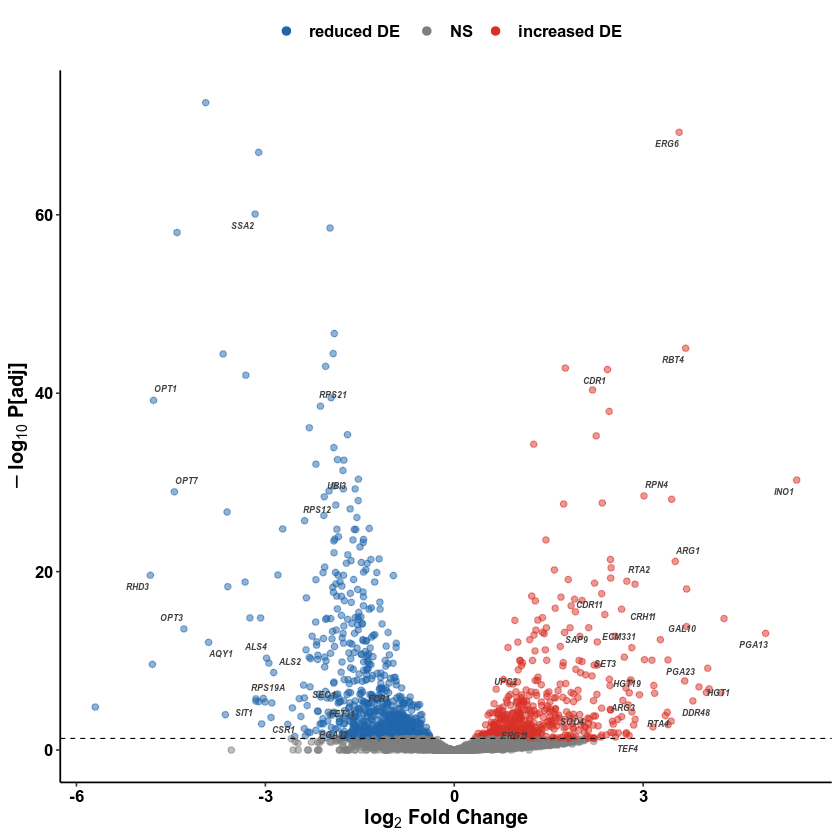

In [9]:
de.results <- read.table("../../results/deseq2/rna_fluconazole_vs_nodrug_annotated/rna_fluconazole_vs_nodrug_annotated.tsv", sep = "\t", stringsAsFactors = F)
de.up.genes <- readLines("../../results/DE_TE_tpm_above_1_cutoff0.75/DE_up.txt")
de.down.genes <- readLines("../../results/DE_TE_tpm_above_1_cutoff0.75/DE_down.txt")
de.tpm.filtered <- read.csv("../../results/DE_TE_tpm_above_1_cutoff0.75/de_expressed_genelist.txt", row.names = 1, sep="\t", stringsAsFactors = F)
de.results <- de.results[row.names(de.tpm.filtered),]


de.results$status <- "NS"
de.results$pvalue[is.na(de.results$pvalue)] <- 1
de.results$padj[is.na(de.results$padj)] <- 1

de.results$status[(de.results$log2FoldChange < 0) & (de.results$padj <0.05)] <- "reduced DE"
de.results$status[(de.results$log2FoldChange > 0) & (de.results$padj <0.05)] <- "increased DE"

rownames(de.results) <- gene_id_to_name[rownames(de.results), "gene_name"]


de.results$status <- factor(de.results$status, levels = c("reduced DE", "NS", "increased DE"))
de.results$gene <- rownames(de.results)
subset_df <- de.results[c(de.down.genes.highlight, de.up.genes.highlight),]
p2 <- ggplot(de.results[!is.na(de.results$pvalue),], aes(log2FoldChange, -log10(padj), color=status)) +
    geom_point(alpha=0.5) + 
    geom_hline(yintercept = -log10(0.05), color = "black", size = 0.3, linetype = "dashed") +
    scale_color_manual(values = c("#2166ac", "grey50", "#d73027"), name="") +
    geom_text_repel(
      data = subset_df, 
        aes(label = gene), color = "gray25",
    segment.size=0, fontface="bold.italic", max.overlaps = Inf, size = 1.8, min.segment.length = 10
    )  + xlab(expression(bold(paste(log[2], " Fold Change")))) + ylab(expression(bold(paste(-log[10], " P[adj]")))) +
        theme(axis.text=element_text(size=10, face="bold"),
        axis.title=element_text(size=12,face="bold"),
             legend.text = element_text(size=10, 
                                     face="bold")) + guides(colour = guide_legend(override.aes = list(alpha = 1, size=2)))

  p2

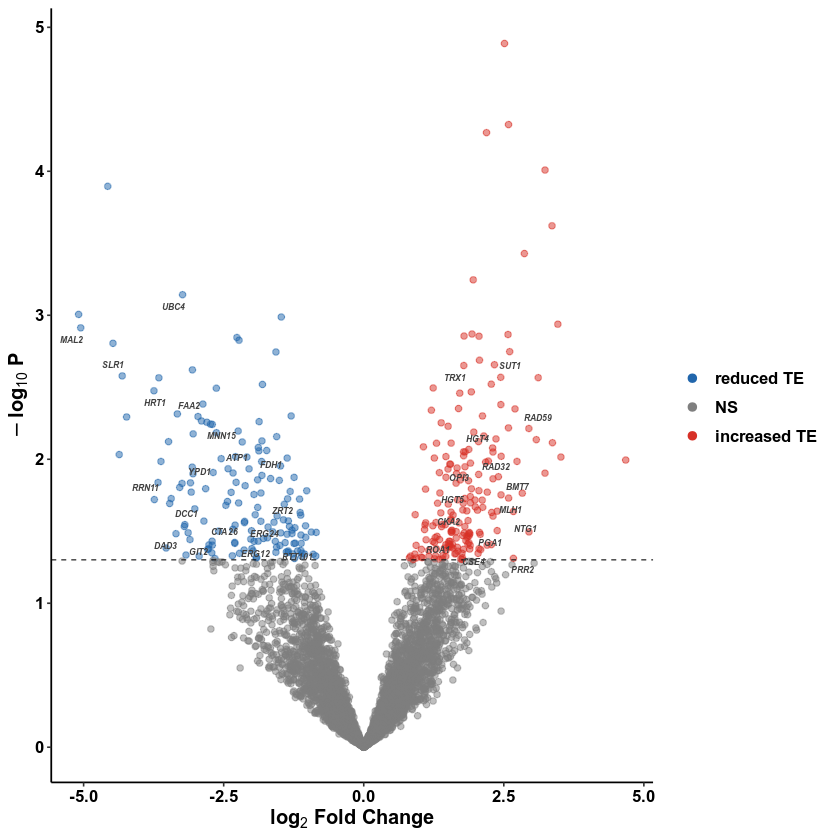

In [10]:
te.results$gene <- rownames(te.results)
te.results$status <- factor(te.results$status, levels = c("reduced TE", "NS", "increased TE"))
subset_df <- te.results[c(te.down.genes.highlight, te.up.genes.highlight),]

p1 <- ggplot(te.results[!is.na(te.results$pvalue),], aes(log2FoldChange, -log10(pvalue), color=status)) +
    geom_point(alpha=0.5) + 
    geom_hline(yintercept = -log10(0.05), color = "black", size = 0.3, linetype = "dashed") +
scale_color_manual(values = c("#2166ac", "grey50", "#d73027"), name="") +
    geom_text_repel(
      data = subset_df, 
        aes(label = gene), color = "gray25",
    segment.size=0, fontface="bold.italic", max.overlaps = Inf, size=1.8, min.segment.length = 10
    )  + xlab(expression(bold(paste(log[2], " Fold Change")))) + ylab(expression(bold(paste(-log[10], " P")))) +
        theme(axis.text=element_text(size=10, face="bold"),
        axis.title=element_text(size=12,face="bold"),
             legend.text = element_text(size=10, 
                                     face="bold")) + guides(colour = guide_legend(override.aes = list(alpha = 1, size=2))) + theme(legend.position = "right", legend.direction = "vertical")
  p1

In [11]:
te.results

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,status,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
RBR1,74.96956,-5.08923061,1.5448377,-3.29434639,0.0009865085,0.15723574,reduced TE,RBR1
MAL2,125.94111,-5.05178304,1.5622676,-3.23362215,0.0012223105,0.17283343,reduced TE,MAL2
C3_07900C,186.49247,-4.56916708,1.1924176,-3.83185129,0.0001271826,0.07583899,reduced TE,C3_07900C
HOL1,309.97343,-4.63140112,1.7930966,-2.58290658,NA,NA,NS,HOL1
C3_03160C,149.14682,-4.47576633,1.4154585,-3.16206123,0.0015665662,0.18316538,reduced TE,C3_03160C
C4_06200W,49.09797,-4.36434744,1.6774949,-2.60170541,0.0092761495,0.37390827,reduced TE,C4_06200W
SLR1,160.45763,-4.31030703,1.4333663,-3.00712188,0.0026373400,0.23480391,reduced TE,SLR1
C5_04040C,132.81140,-4.23281320,1.5109124,-2.80149470,0.0050866476,0.31595500,reduced TE,C5_04040C
C1_06870C,69.80473,4.67580671,1.8183308,2.57148301,0.0101263985,0.37477629,increased TE,C1_06870C


In [12]:
-log10(NA)

[1] NA

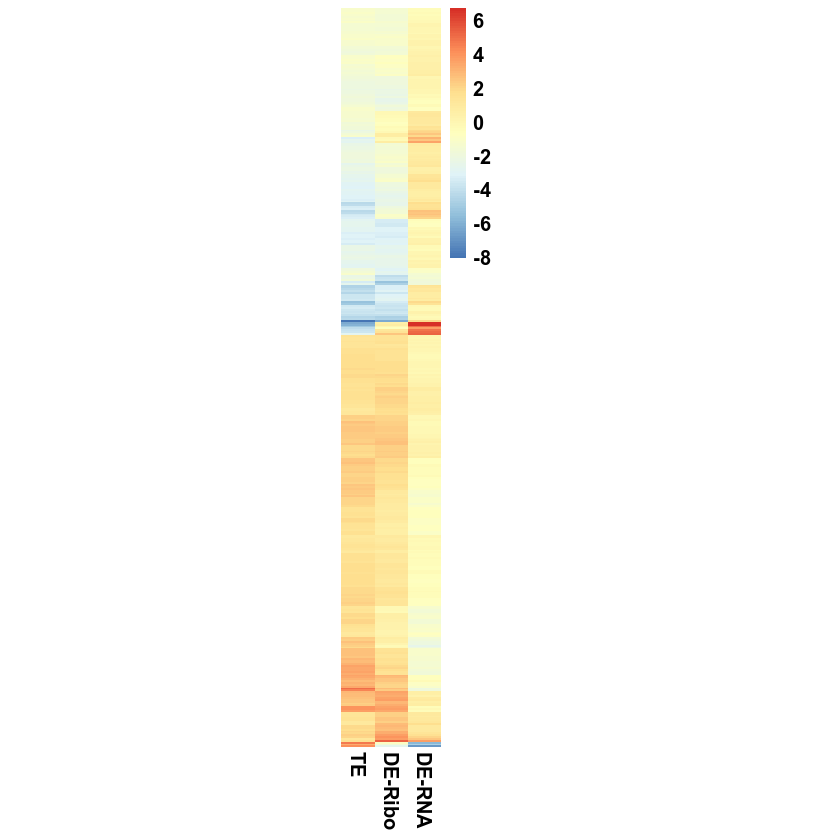

In [13]:
te.deribo.derna <- read.table("../../data/15A_TE-heatmap/TE_DEribo_DErna_for_TE_genes.tsv", 
                              row.names=1, 
                              stringsAsFactors=F, check.names = F)
mat <- te.deribo.derna
sort_hclust <- function(...) as.hclust(dendsort(as.dendrogram(...)))
mat_cluster_cols <- sort_hclust(hclust(dist(t(te.deribo.derna))))
mat_cluster_rows <- sort_hclust(hclust(dist(te.deribo.derna)))

p3 <- pheatmap(
  mat               = mat,
  border_color      = NA,
  cluster_cols      = mat_cluster_cols,
  cluster_rows      = mat_cluster_rows,
  cellwidth         = 20,
  show_colnames     = TRUE,
  show_rownames     = FALSE,
  #annotation_col    = mat_col,
  #annotation_colors = mat_colors,
  drop_levels       = TRUE,
  fontsize          = 12,
    fontface = "bold",
  #filename         = file.path('../plots/02.Differential_TE/TE_DE_genes_heatmap.pdf') 
  treeheight_row = 0, treeheight_col = 0
  #main              = "TE genes"
)

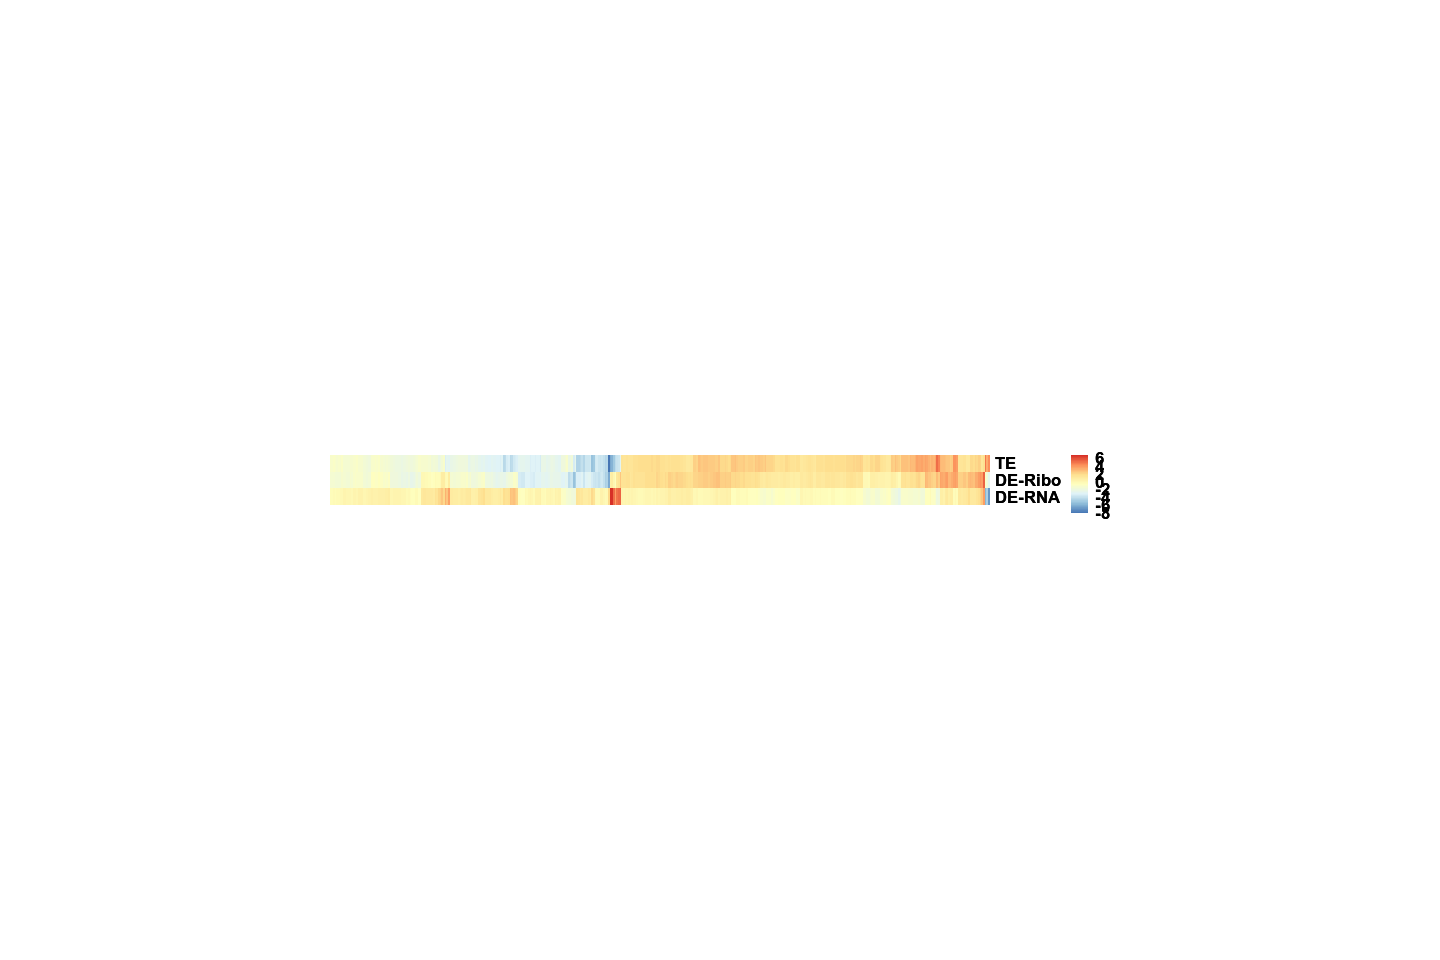

In [14]:
mat <- t(te.deribo.derna)
sort_hclust <- function(...) as.hclust(dendsort(as.dendrogram(...)))
mat_cluster_cols <- sort_hclust(hclust(dist(te.deribo.derna)))
mat_cluster_rows <- sort_hclust(hclust(dist(t(te.deribo.derna))))

options(repr.plot.width=12, repr.plot.height=8)
p3 <- pheatmap(
  mat               = mat,
  border_color      = NA,
  cluster_rows      = mat_cluster_rows,
  cluster_cols      = mat_cluster_cols,
  cellheight         = 10,
  cellwidth         = 1,
  show_rownames     = TRUE,
  show_colnames     = FALSE,
  #annotation_col    = mat_col,
  #annotation_colors = mat_colors,
  drop_levels       = TRUE,
  fontsize          = 10,
    fontface = "bold",
  #filename         = file.path('../plots/02.Differential_TE/TE_DE_genes_heatmap.pdf') 
  treeheight_row = 0, treeheight_col = 0
  #main              = "TE genes"
)
p3

In [15]:
p3 <- as.ggplot(p3)

# GO ontology

In [16]:
te_go_up <- read.table('~/github/C_albicans_Fluconazole/Tables/GOslim/TE_log2FC1_padj05_pos.tsv', sep="\t", header = T)
te_go_down <- read.table('~/github/C_albicans_Fluconazole/Tables/GOslim/TE_log2FC1_padj05_neg.tsv', sep="\t", header=T)
te_go_up$GeneRatio <- unlist(sapply(te_go_up$GeneRatio, FUN = function(x) eval(parse(text = x))))
te_go_down$GeneRatio <- unlist(sapply(te_go_down$GeneRatio, FUN = function(x) eval(parse(text = x))))


In [17]:
df <- te_go_up

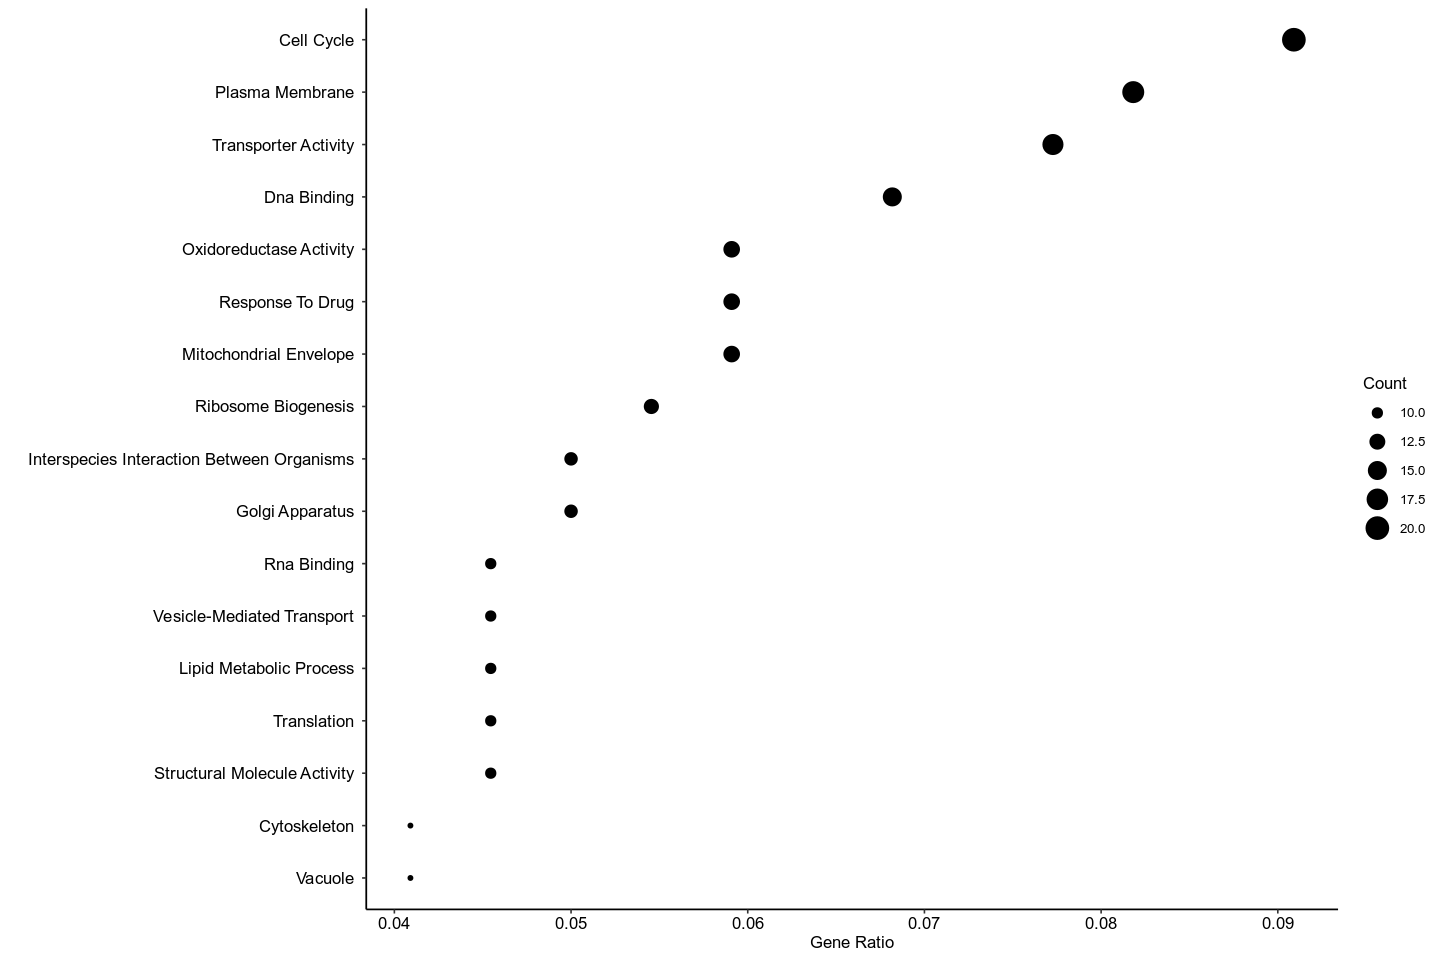

In [18]:
df$ID_str <- stringr::str_to_title(stringr::str_split_fixed(df$ID, pattern = "\\(", n=2)[,1])

df_subset <- df %>% filter(GeneRatio >= 0.04) %>% arrange(GeneRatio, pvalue)
df_subset$ID_str <- factor(df_subset$ID_str, levels=df_subset$ID_str)
ggplot(df_subset, aes(GeneRatio, ID_str, size=Count)) + geom_point() + ylab("") + xlab("Gene Ratio") + 
theme(legend.position="right", legend.direction="vertical")

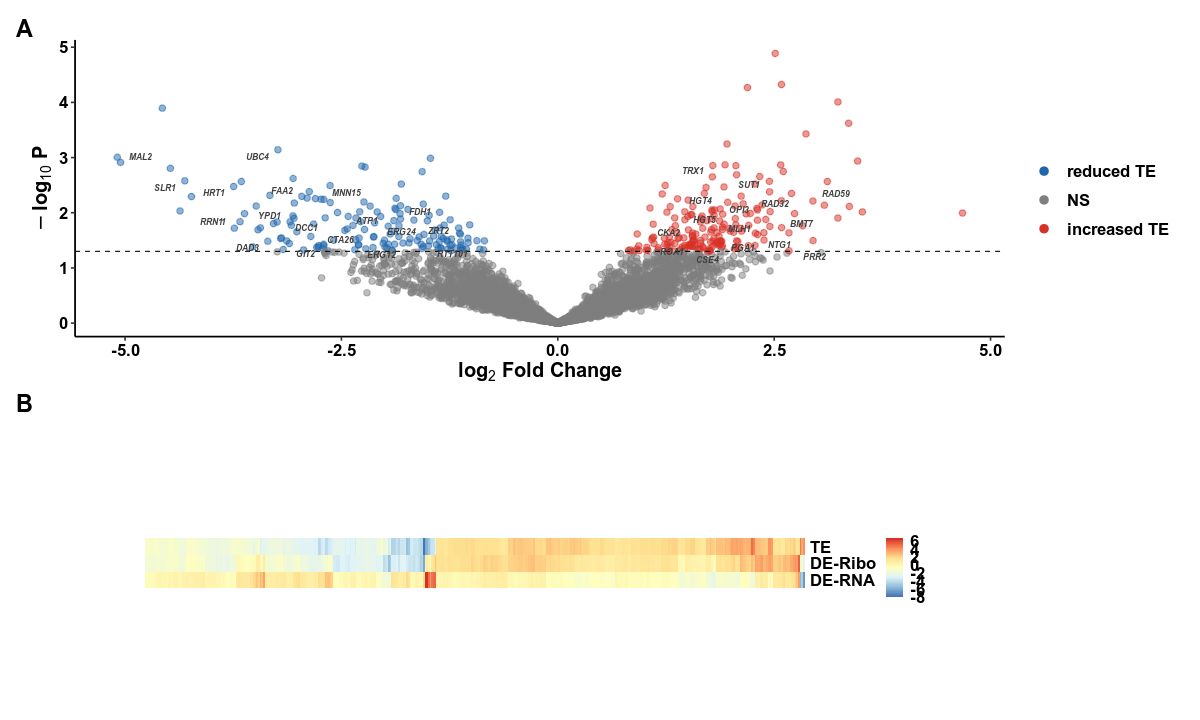

In [21]:
layout <- "A
B"

p <- p1 + p3 + plot_layout(design = layout, tag_level =  'new')  + plot_annotation(tag_levels = 'A') &
    theme(plot.tag = element_text(face = 'bold', size=14))

options(repr.plot.width=10, repr.plot.height=6)
p
#ggsave(filename = "../plots/Figure2_Draft.pdf", plot = p, width = 8, height=5)

ERROR: Error in loadNamespace(x): there is no package called ‘svglite’


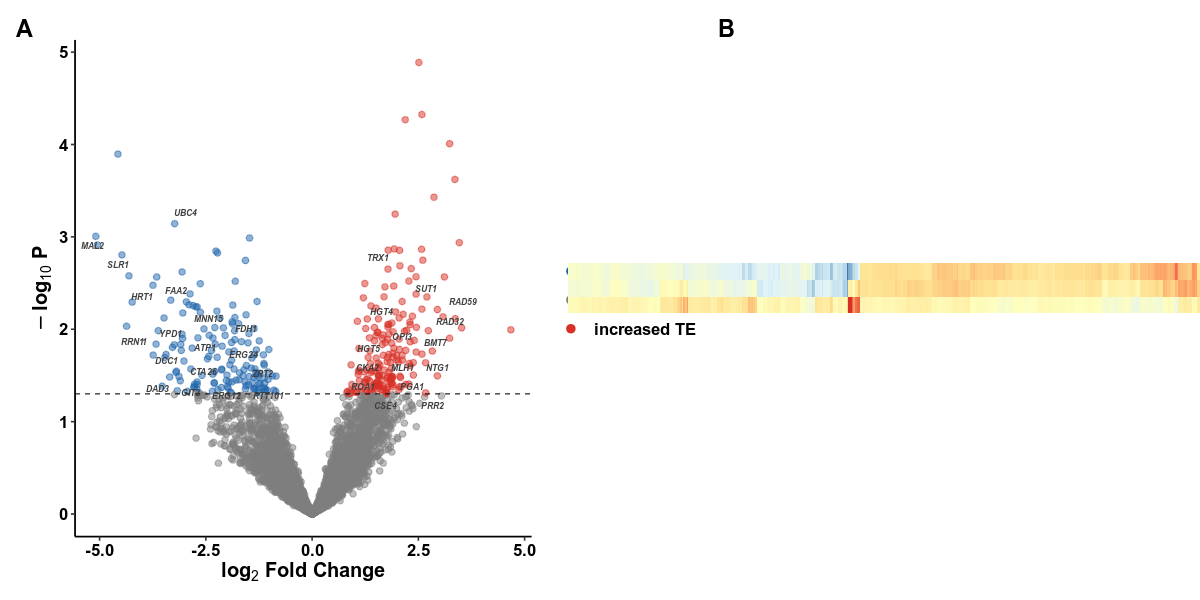

In [22]:
layout <- "AB"

p <- p1 + p3 + plot_layout(design = layout, tag_level =  'new')  + plot_annotation(tag_levels = 'A') &
    theme(plot.tag = element_text(face = 'bold', size=14), panel.background = element_blank(),
plot.background = element_blank(),
legend.background = element_rect(fill = 'transparent'),
panel.border = element_blank())

options(repr.plot.width=10, repr.plot.height=5)
p 
ggsave(filename = "../plots/Figure2_Draft.pdf", plot = p, width = 10, height=5)
ggsave(filename = "../plots/Figure2_Draft.svg", plot = p, width = 10, height=5)

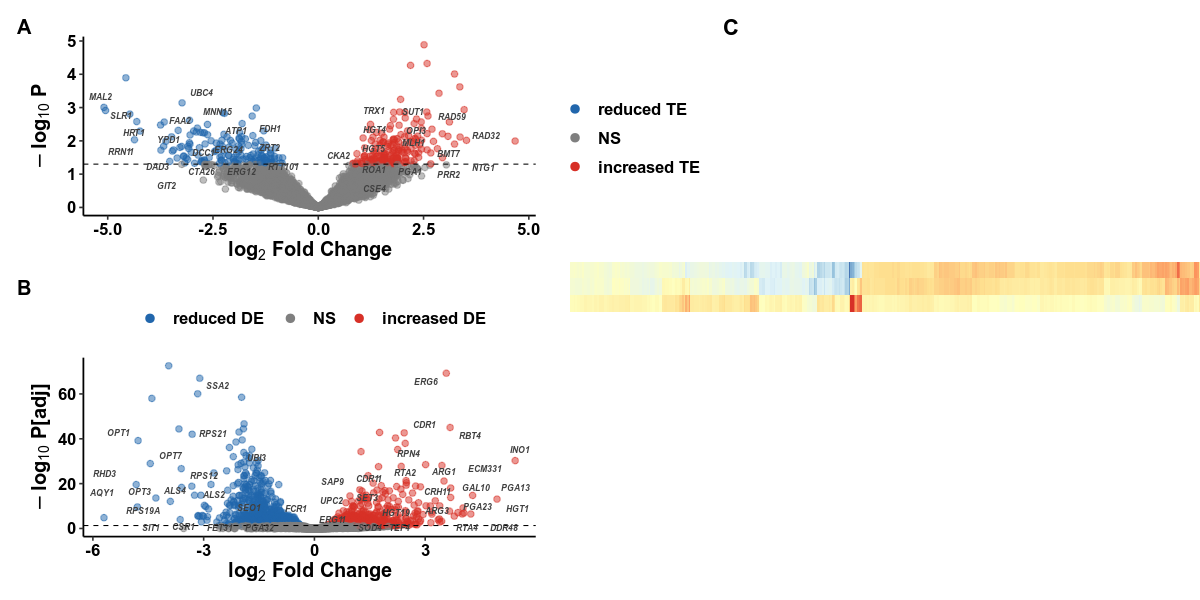

In [23]:
layout <- "AC
BC
"

p <- p1 + p2 + p3 + plot_layout(design = layout, tag_level =  'new')  + plot_annotation(tag_levels = 'A') &
    theme(plot.tag = element_text(face = 'bold'))
p
ggsave(filename = "../plots/Figure2_Draft.pdf", plot = p, width = 8, height=8)

In [27]:
te.results["CSE4",]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,status,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CSE4,175.1321,1.901187,0.9241096,2.057317,0.03965572,0.5372172,increased TE,CSE4
